# Internet of Things Application Development
# Lab 4 - AI in IoT application
Task: Your task is to setup and build an ML/DL model to process and predict temperature and humidity data taken from your sensors.

## Convolution Neural Network singular variable model
This is an example to predict the humidity given a sequence of humidity data

In [26]:

# from google.colab import drive
import paho.mqtt.client as mqttclient
import time
import json
import numpy as np
import pandas as pd
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
# from google.colab import auth
# auth.authenticate_user()

# from googleapiclient.discovery import build
# from googleapiclient.http import MediaIoBaseDownload
import io

In [9]:
# Data preprocessing
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# Find the end of this pattern
		end_ix = i + n_steps
		# Check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# Gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [12]:
# # Function to read csv file from google drive
# def read_csv_from_drive_link(file_id):
#   drive_service = build('drive', 'v3')
#   request = drive_service.files().get_media(fileId=file_id)
#   downloaded = io.BytesIO()
#   downloader = MediaIoBaseDownload(downloaded, request)
#   done = False
#   while done is False:
#     status, done = downloader.next_chunk()

#   downloaded.seek(0)
#   return pd.read_csv(downloaded)

# Read the csv file locally
def read_csv_from_local(file_path):
    return pd.read_csv(file_path)

In [13]:
# Read given train and test sets
# train_data = read_csv_from_drive_link("1CvX-gjGkiPDojF9vG9VQVJ5sBxNCOG1P")
# test_data = read_csv_from_drive_link("1Kvv5EBQFad5PfoEkSgiMKVT1dE-9BglZ")
# humi_seq_train = train_data['Relative_humidity_room'].tolist()
# humi_seq_test = test_data['Relative_humidity_room'].tolist()

train_data = read_csv_from_local("train.csv")
test_data = read_csv_from_local("test_with_temperature.csv")
humi_seq_train = train_data['Relative_humidity_room'].tolist()
humi_seq_test = test_data['Relative_humidity_room'].tolist()

In [38]:
# Preprocessing steps
# Choose a number of time steps
n_steps = 3
# Split into samples
X, y = split_sequence(humi_seq_train, n_steps)
# Reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [39]:
# Define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Fit model
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.7813
Epoch 2/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.7600
Epoch 3/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.8230
Epoch 4/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36.8711
Epoch 5/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.3950
Epoch 6/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38.4696
Epoch 7/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.1428
Epoch 8/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.1664
Epoch 9/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.5126
Epoch 10/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.1053
Epoch 11/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.3162
Epoch 12/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.6935
Epoch 13/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.3328
Epoch 14/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.2302
Epoch 15/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - los

In [ ]:
# # Predict on test set based on the steps
# for i in range(10):
#   random_num = random.randint(0, len(humi_seq_test)-4)
#   x_input = np.array(humi_seq_test[random_num:random_num+n_steps])
#   x_input = x_input.reshape((1, n_steps, n_features))
#   predicted_value = model.predict(x_input, verbose=0)
#   arr_predicted_value = np.array(predicted_value[0][0])
#   rmse = np.sqrt(np.mean((humi_seq_test[random_num+n_steps] - predicted_value[0][0])**2))
#   print("Sequence:", np.array(humi_seq_test[random_num:random_num+n_steps]),"Next value:", humi_seq_test[random_num+n_steps], ", Predicted next value:", predicted_value[0][0], ", RMSE:", rmse)

# Create an array to store predictions
arr_predicted_value = []

# Predict on test set based on the steps
for i in range(10):
  random_num = random.randint(0, len(humi_seq_test)-4)
  x_input = np.array(humi_seq_test[random_num:random_num+n_steps])
  x_input = x_input.reshape((1, n_steps, n_features))
  predicted_value = model.predict(x_input, verbose=0)
  
  # Store each prediction in the array
  arr_predicted_value.append(float(predicted_value[0][0]))
  
  rmse = np.sqrt(np.mean((humi_seq_test[random_num+n_steps] - predicted_value[0][0])**2))
  print("Sequence:", np.array(humi_seq_test[random_num:random_num+n_steps]),
        "Next value:", humi_seq_test[random_num+n_steps], 
        ", Predicted next value:", predicted_value[0][0], 
        ", RMSE:", rmse)

print(f"Stored {len(arr_predicted_value)} predictions for publishing")


BROKER_ADDRESS = "app.coreiot.io"
PORT = 1883
ACCESS_TOKEN = "ZanPPcJRQ1scJ1tA8psn"
ACCESS_USERNAME = "device_1"

def subscribed(client, userdata, mid, granted_qos):
    print("Subscribed...")


def recv_message(client, userdata, message):
    print("Received: ", message.payload.decode("utf-8"))
    temp_data = {'value': True}
    try:
        jsonobj = json.loads(message.payload)
        if jsonobj['method'] == "setValue":
            print("Method is " + jsonobj['method'])
            temp_data['value'] = jsonobj['params']
            client.publish('v1/devices/me/attributes', json.dumps(temp_data), 1)
    except:
        pass


def connected(client, usedata, flags, rc):
    if rc == 0:
        print("Connected successfully!!")
        client.subscribe("v1/devices/me/rpc/request/+")
    else:
        print("Connection is failed")


client = mqttclient.Client(mqttclient.CallbackAPIVersion.VERSION1,"device_1")
client.username_pw_set(ACCESS_TOKEN)

client.on_connect = connected
client.connect(BROKER_ADDRESS, 1883)
client.loop_start()

client.on_subscribe = subscribed
client.on_message = recv_message

temp = 30
humi = 50
light_intesity = 100
counter = 0

long = 106.80633605864662
lat = 10.880018410410052
counter = 0
while True:
    # Use modulo to cycle through predictions if we run out
    prediction_index = counter % len(arr_predicted_value)
    
    collect_data = {
        'temperature': temp, 
        'humidity': arr_predicted_value[prediction_index], 
        'light': light_intesity, 
        'long': long, 
        'lat': lat,
        'is_predicted': True  # Flag to indicate this is a predicted value
    }
    
    temp += 1
    light_intesity += 1
    counter += 1
    
    client.publish('v1/devices/me/telemetry', json.dumps(collect_data), 1)
    
    if(temp > 50):
        temp = 30
        
    time.sleep(5)

Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!
Subscribed...
Connected successfully!!


## The multivariate model
This is an example to predict two different values (humidity & CO2) in 1 multivariate model

In [18]:
# Split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# Find the end of this pattern
		end_ix = i + n_steps
		# Check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# Gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [48]:
# Read given CO2 data in train and test sets
humi_seq_train = np.array(train_data['Relative_humidity_room'])
humi_seq_test = np.array(test_data['Relative_humidity_room'])
temp_seq_train = np.array(train_data['Indoor_temperature_room'])
temp_seq_test = np.array(test_data['Indoor_temperature_room'])

In [76]:
# Preprocessing steps
# Convert to [rows, columns] structure
humi_seq_train = humi_seq_train.reshape((len(humi_seq_train), 1))
temp_seq_train = temp_seq_train.reshape((len(temp_seq_train), 1))
# Horizontally stack columns
dataset = np.hstack((humi_seq_train, temp_seq_train))
# Choose a number of time steps
n_steps = 3
# Convert into input/output
X, y = split_sequences(dataset, n_steps)
# The dataset knows the number of features
n_features = X.shape[2]

In [77]:
# Define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
# Fit model
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 702.6696
Epoch 2/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.4516
Epoch 3/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8532
Epoch 4/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2604
Epoch 5/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1988
Epoch 6/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1708
Epoch 7/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1833
Epoch 8/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1842
Epoch 9/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1766
Epoch 10/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1925
Epoch 11/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1889
Epoch 12/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1822
Epoch 13/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1689
Epoch 14/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1876
Epoch 15/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2069
Ep

In [ ]:
import pandas as pd

# Initialize the CSV file with columns if not existing
rmse_data = pd.DataFrame(columns=['RMSE_Humi', 'RMSE_Temp'])

temp = 30
humi = 50
light_intensity = 100
counter = 0

while True:
    random_num = random.randint(0, len(test_data)-4)
    x_input = np.vstack((humi_seq_test[random_num:random_num+n_steps], temp_seq_test[random_num:random_num+n_steps])).T
    x_input = x_input.reshape((1, n_steps, n_features))
    
    # Get the predicted values from the model
    predicted_value = model.predict(x_input, verbose=0)
    
    # Calculate RMSE for humidity and temperature
    rmse_humi = np.sqrt(np.mean((humi_seq_test[random_num+n_steps] - predicted_value[0][0])**2))
    rmse_temp = np.sqrt(np.mean((temp_seq_test[random_num+n_steps] - predicted_value[0][1])**2))
    
    # Print the results (optional for debugging)
    print("Sequence", counter)
    print("Humidity sequence:", np.array(humi_seq_test[random_num:random_num+n_steps]), ", Next value:", humi_seq_test[random_num+n_steps], ", Predicted humidity:", predicted_value[0][0], ", RMSE:", rmse_humi)
    print("Temp sequence:", np.array(temp_seq_test[random_num:random_num+n_steps]), ", Next value:", temp_seq_test[random_num+n_steps], ", Predicted temperature:", predicted_value[0][1], ", RMSE:", rmse_temp)
    print("-"*20)

    # Collect data for publishing
    collect_data = {'temperature': float(predicted_value[0][1]), 'humidity': float(predicted_value[0][0]), 'light': light_intensity}
    temp += 1
    humi += 1
    light_intensity += 1
    
    # Publish data to the MQTT broker
    client.publish('v1/devices/me/telemetry', json.dumps(collect_data), 1)
    
    # Create a new DataFrame for the current RMSE values
    rmse_row = pd.DataFrame({'RMSE_Humi': [rmse_humi], 'RMSE_Temp': [rmse_temp]})
    
    # Concatenate the new row to the existing DataFrame
    rmse_data = pd.concat([rmse_data, rmse_row], ignore_index=True)
    
    # Save the DataFrame to a CSV file after each iteration
    rmse_data.to_csv('rmse_values_with_threeStep.csv', index=False)  # This will save the CSV to Google Colab environment
        
    # Sleep to control the rate of execution
    time.sleep(1)
    
    counter += 1

Sequence 0
Humidity sequence: [43.0267 43.104  43.184 ] , Next value: 43.3253 , Predicted humidity: 42.977596 , RMSE: 0.3477037170410142
Temp sequence: [18.39302826 18.30990506 18.32480156] , Next value: 18.38283449667025 , Predicted temperature: 18.616077 , RMSE: 0.2332429264254543
--------------------


D:\window-temp\temp\ipykernel_12752\1669405478.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rmse_data = pd.concat([rmse_data, rmse_row], ignore_index=True)


Sequence 1
Humidity sequence: [35.712  36.0053 35.6347] , Next value: 36.296 , Predicted humidity: 35.672005 , RMSE: 0.6239953002929681
Temp sequence: [20.43241052 20.32114282 20.37670502] , Next value: 19.94020845865317 , Predicted temperature: 20.694077 , RMSE: 0.7538680794327668
--------------------
Sequence 2
Humidity sequence: [38.724  39.016  39.2573] , Next value: 39.556 , Predicted humidity: 39.311398 , RMSE: 0.244602447509763
Temp sequence: [20.88552702 20.60937327 20.15562202] , Next value: 20.02524914652827 , Predicted temperature: 20.668962 , RMSE: 0.6437133321094244
--------------------
Sequence 3
Humidity sequence: [51.7653 51.4667 51.128 ] , Next value: 50.9307 , Predicted humidity: 51.063717 , RMSE: 0.13301688842773274
Temp sequence: [19.30974487 19.267786   19.15802208] , Next value: 18.65589830416941 , Predicted temperature: 19.690231 , RMSE: 1.034333019072779
--------------------
Sequence 4
Humidity sequence: [38.7    38.936  38.9293] , Next value: 38.616 , Predicted

Average Humidity RMSE - 3-Step: 0.2702, 5-Step: 0.2189
Average Temperature RMSE - 3-Step: 0.4022, 5-Step: 0.4210


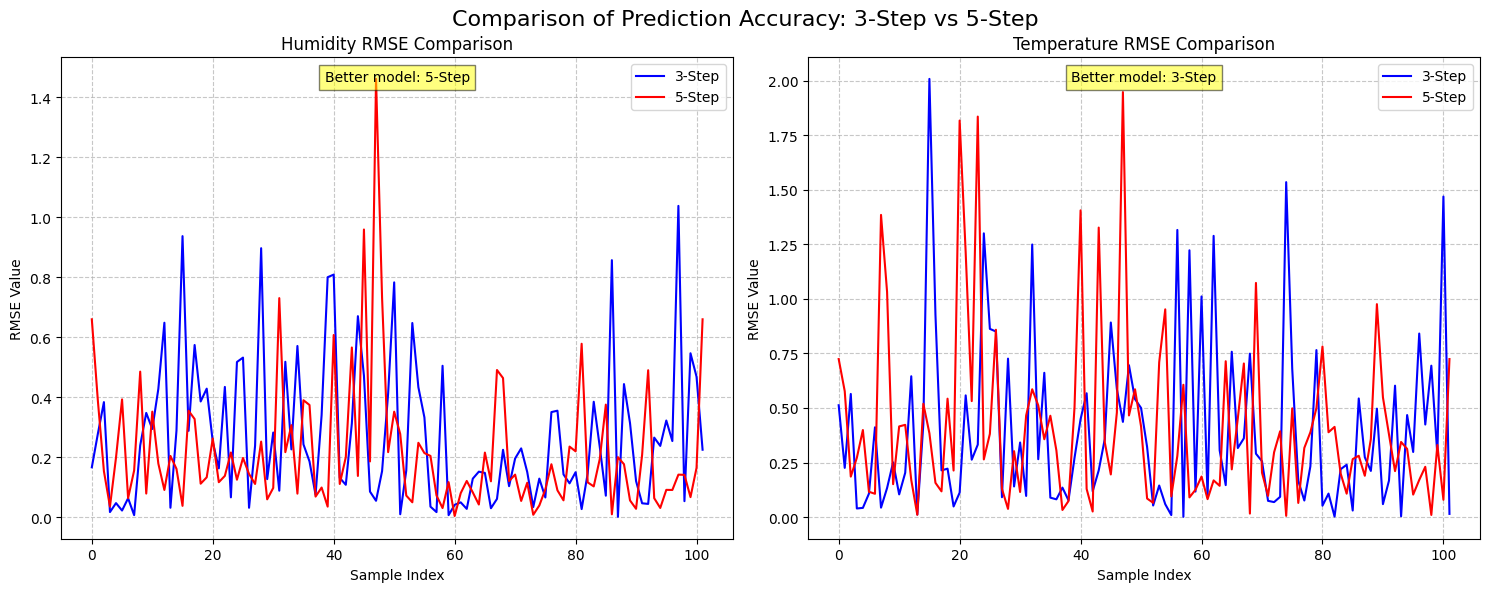

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def compare_rmse_values(file_3step, file_5step):
    """
    Compare RMSE values between 3-step and 5-step prediction models
    
    Parameters:
    file_3step (str): Path to the CSV file with 3-step RMSE values
    file_5step (str): Path to the CSV file with 5-step RMSE values
    """
    # Read the CSV files
    rmse_3step = pd.read_csv(file_3step)
    rmse_5step = pd.read_csv(file_5step)
    
    # Calculate average RMSE values for comparison
    avg_3step_humi = rmse_3step['RMSE_Humi'].mean()
    avg_5step_humi = rmse_5step['RMSE_Humi'].mean()
    avg_3step_temp = rmse_3step['RMSE_Temp'].mean()
    avg_5step_temp = rmse_5step['RMSE_Temp'].mean()
    
    # Set up the figure with two subplots (humidity and temperature)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot humidity RMSE comparison
    ax1.plot(rmse_3step.index, rmse_3step['RMSE_Humi'], 'b-', label='3-Step')
    ax1.plot(rmse_5step.index, rmse_5step['RMSE_Humi'], 'r-', label='5-Step')
    ax1.set_title('Humidity RMSE Comparison')
    ax1.set_xlabel('Sample Index')
    ax1.set_ylabel('RMSE Value')
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Add text indicating which is better for humidity
    better_humi = "3-Step" if avg_3step_humi < avg_5step_humi else "5-Step"
    ax1.text(0.5, 0.95, f'Better model: {better_humi}',
             transform=ax1.transAxes, 
             bbox=dict(facecolor='yellow', alpha=0.5),
             horizontalalignment='center')
    
    # Plot temperature RMSE comparison
    ax2.plot(rmse_3step.index, rmse_3step['RMSE_Temp'], 'b-', label='3-Step')
    ax2.plot(rmse_5step.index, rmse_5step['RMSE_Temp'], 'r-', label='5-Step')
    ax2.set_title('Temperature RMSE Comparison')
    ax2.set_xlabel('Sample Index')
    ax2.set_ylabel('RMSE Value')
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Add text indicating which is better for temperature
    better_temp = "3-Step" if avg_3step_temp < avg_5step_temp else "5-Step"
    ax2.text(0.5, 0.95, f'Better model: {better_temp}',
             transform=ax2.transAxes, 
             bbox=dict(facecolor='yellow', alpha=0.5),
             horizontalalignment='center')
    
    # Add overall title and adjust layout
    plt.suptitle('Comparison of Prediction Accuracy: 3-Step vs 5-Step', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    
    # Print summary statistics
    print(f"Average Humidity RMSE - 3-Step: {avg_3step_humi:.4f}, 5-Step: {avg_5step_humi:.4f}")
    print(f"Average Temperature RMSE - 3-Step: {avg_3step_temp:.4f}, 5-Step: {avg_5step_temp:.4f}")
    
    # Show the plot
    plt.show()

# Call the function with your file paths
compare_rmse_values('rmse_values_with_three_step.csv', 'rmse_values_with_five_step.csv')